For analyzing and understanding the waves first:

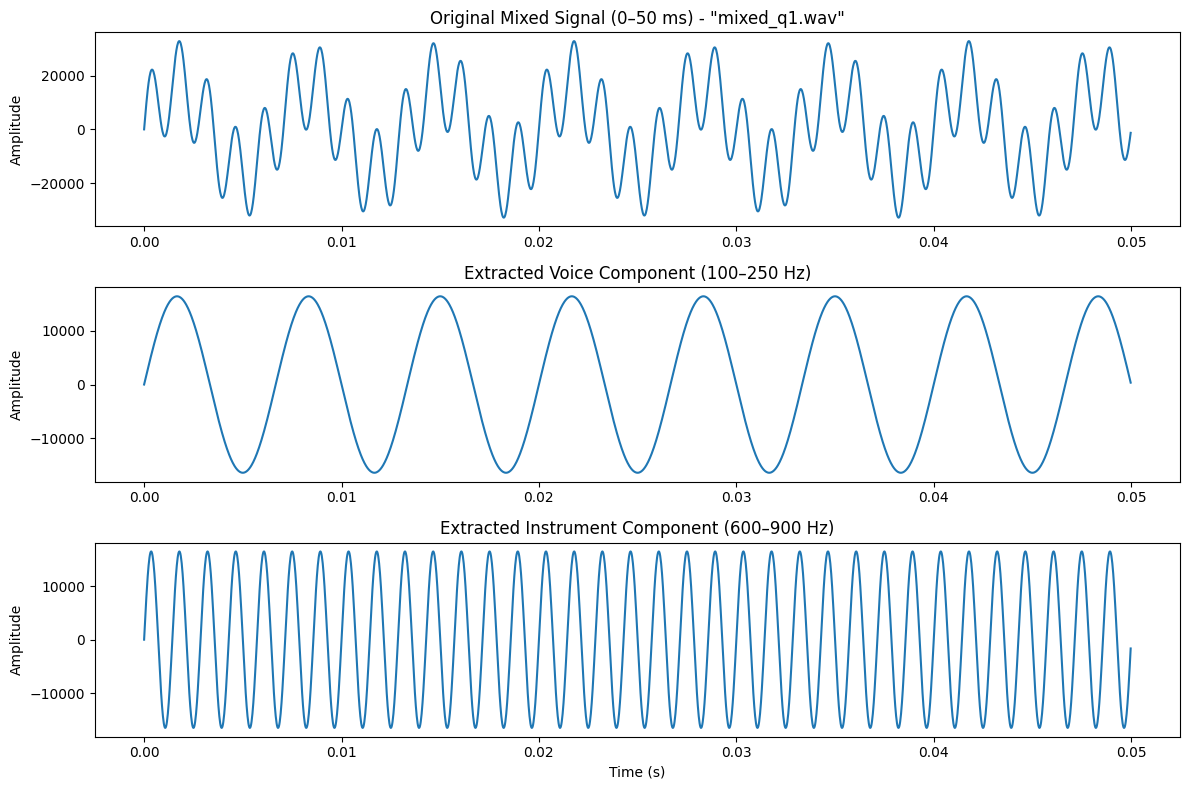

In [20]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1. Load mixed signal
fs, data = wavfile.read('inputs/mixed_q1.wav')
if data.ndim > 1:
    data = data.mean(axis=1)

# 2. FFT of the signal
N = len(data)
X = np.fft.rfft(data)
freq = np.fft.rfftfreq(N, d=1/fs)

# 3. Create rectangular band-pass masks
mask_voice = (freq >= 100) & (freq <= 250)
mask_instr = (freq >= 600) & (freq <= 900)

# 4. Apply masks
X_voice = X * mask_voice
X_instr = X * mask_instr

# 5. Inverse FFT to get time-domain separated signals
voice = np.fft.irfft(X_voice, n=N)
instr = np.fft.irfft(X_instr, n=N)

# 6. Plot separated signals (zoomed into first 50 ms)
t = np.arange(N) / fs
zoom_samples = int(0.05 * fs)  # first 50 ms

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t[:zoom_samples], data[:zoom_samples])
plt.title('Original Mixed Signal (0–50 ms) - "mixed_q1.wav"')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.plot(t[:zoom_samples], voice[:zoom_samples])
plt.title('Extracted Voice Component (100–250 Hz)')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.plot(t[:zoom_samples], instr[:zoom_samples])
plt.title('Extracted Instrument Component (600–900 Hz)')
plt.ylabel('Amplitude')
plt.xlabel('Time (s)')

plt.tight_layout()
plt.show()

Generating the 2 separate tones and finding the frequency spectra of them:

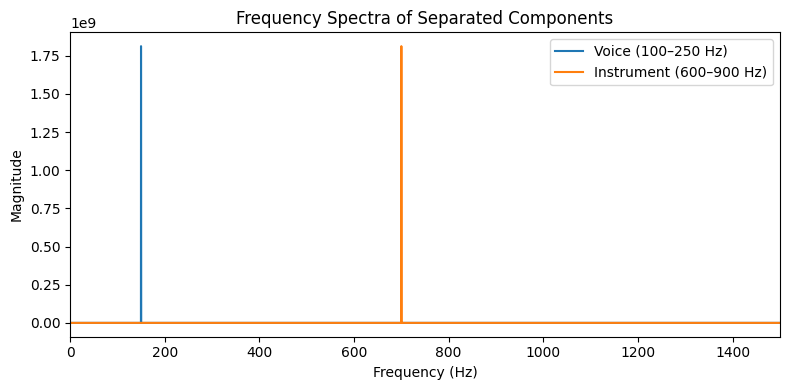

In [16]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

# 1. Load mixed signal
fs, data = wavfile.read('inputs/mixed_q1.wav')
if data.ndim > 1:
    data = data.mean(axis=1)

# 2. FFT separation
N = len(data)
X = np.fft.rfft(data)
freq = np.fft.rfftfreq(N, d=1/fs)
mask_voice = (freq >= 100) & (freq <= 250)
mask_instr = (freq >= 600) & (freq <= 900)
X_voice = X * mask_voice
X_instr = X * mask_instr
voice = np.fft.irfft(X_voice, n=N)
instr = np.fft.irfft(X_instr, n=N)

# 3. Normalize and convert to 16-bit PCM
voice_int16 = np.int16(voice / np.max(np.abs(voice)) * 32767)
instr_int16 = np.int16(instr / np.max(np.abs(instr)) * 32767)

# 4. Save to WAV files
wavfile.write('voice_separated_Q1.wav', fs, voice_int16)
wavfile.write('instrument_separated_Q1.wav', fs, instr_int16)

# 5. Compute magnitude spectra
mag_voice = np.abs(X_voice)
mag_instr = np.abs(X_instr)

# 6. Plot and compare spectra
plt.figure(figsize=(8, 4))
plt.plot(freq, mag_voice, label='Voice (100–250 Hz)')
plt.plot(freq, mag_instr, label='Instrument (600–900 Hz)')
plt.xlim(0, 1500)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectra of Separated Components')
plt.legend()
plt.tight_layout()
plt.show()
